**Notebook-1: Visualization of a Random Supply Chain Graph**

**Kunal Kishore || 22810041**

This notebook is dedicated to visualizing a randomly generated supply chain network. The visualization process aims to provide insights into the structure and connectivity of the supply chain, aiding stakeholders in understanding the flow of goods and information.



In [1]:
!pip install torch_geometric
!pip install ortools

In [2]:
# Importing necessary libraries
import random
import networkx as nx
import matplotlib.pyplot as plt

### Supply Chain Graph Visualization

Visualizing the supply chain graph provides a comprehensive overview of the network structure, enabling us to identify key nodes, critical paths, and potential bottlenecks.




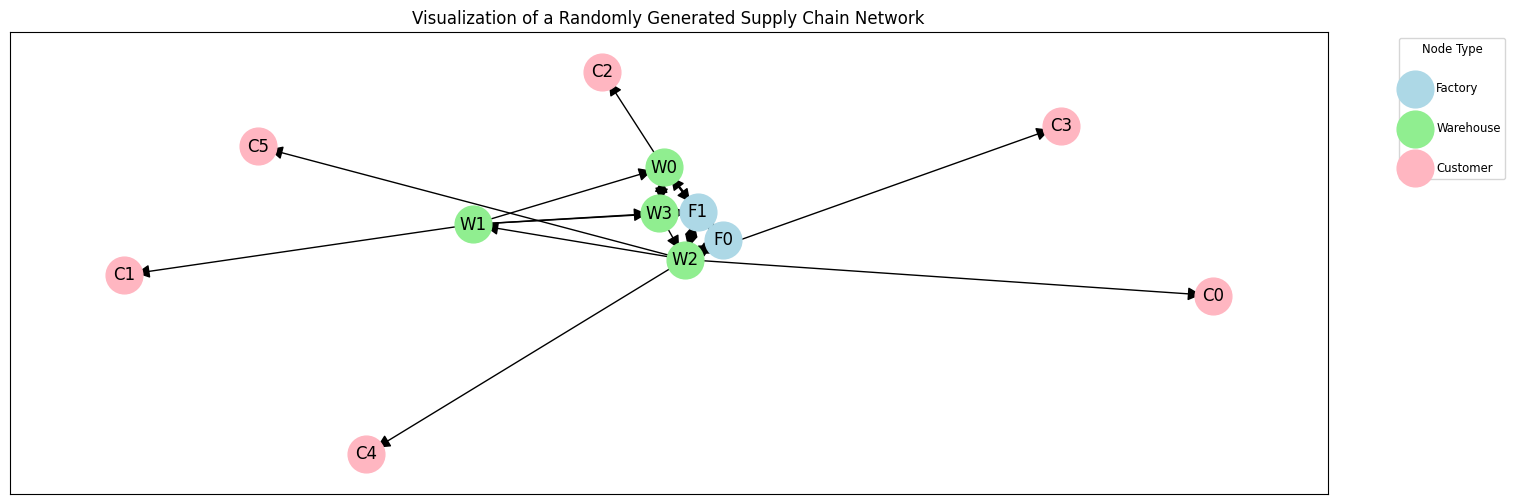

In [3]:
# Set random seed for reproducibility
random.seed(22810041)

# Define the number of nodes and categories
num_nodes = 12
num_factory_nodes = 2
num_warehouse_nodes = 4
num_customer_nodes = num_nodes - num_factory_nodes - num_warehouse_nodes

# Generate a random supply chain graph with categorized nodes and without self-edges
factory_nodes = [f"F{i}" for i in range(num_factory_nodes)]
warehouse_nodes = [f"W{i}" for i in range(num_warehouse_nodes)]
customer_nodes = [f"C{i}" for i in range(num_customer_nodes)]

supply_nodes = factory_nodes + warehouse_nodes + customer_nodes

# Generate edges to ensure each node is connected to at least one other node
supply_edges = set()
for node in supply_nodes:
    other_nodes = supply_nodes.copy()
    other_nodes.remove(node)
    if node.startswith('C'):  # Exclude edges coming out from customer nodes and ensure no edges between customer nodes
        other_nodes = [n for n in other_nodes if not n.startswith('C')]
        connected_node = 'C' + str(random.choice(range(num_customer_nodes)))  # Connect customer nodes randomly
    else:
        connected_node = random.choice(other_nodes)
    supply_edges.add((node, connected_node))

# Add additional random edges
while len(supply_edges) < num_nodes*2:
    supply_edge = (random.choice(supply_nodes), random.choice(supply_nodes))
    if supply_edge[0] != supply_edge[1] and not (supply_edge[0].startswith('C') or supply_edge[1].startswith('C')):
        # Ensure no self-edges and no edges between customer nodes
        if not (supply_edge[0].startswith('C') and supply_edge[1].startswith('C')):
            supply_edges.add(supply_edge)

supply_graph = nx.DiGraph()
supply_graph.add_nodes_from(supply_nodes)
supply_graph.add_edges_from(supply_edges)

# Remove self-edges
supply_graph.remove_edges_from(nx.selfloop_edges(supply_graph))

# Create a list of edges to remove
edges_to_remove = [(u, v) for u, v in supply_graph.edges() if u.startswith('C') and v.startswith('C')]

# Remove edges between customer nodes and connect them to a warehouse node
for u, v in edges_to_remove:
    warehouse_node = random.choice(warehouse_nodes)
    supply_graph.add_edge(u, warehouse_node)
    supply_graph.remove_edge(u, v)

# Reverse the direction of edges starting from customer nodes
customer_edges = [(u, v) for u, v in supply_graph.edges() if u.startswith('C')]
for u, v in customer_edges:
    supply_graph.remove_edge(u, v)
    supply_graph.add_edge(v, u)

# Generate positions for all nodes
supply_pos = nx.spring_layout(supply_graph)

# Define colors for different categories of nodes
node_colors = {'Factory': 'lightblue', 'Warehouse': 'lightgreen', 'Customer': 'lightpink'}

# Create node type dictionary for legend
node_types = {'Factory': factory_nodes, 'Warehouse': warehouse_nodes, 'Customer': customer_nodes}

# Visualize the supply chain network
plt.figure(figsize=(17, 6))

# Draw nodes for each category with different colors
for node_type, color in node_colors.items():
    nx.draw_networkx_nodes(supply_graph, supply_pos, nodelist=node_types[node_type], node_color=color, node_size=700, label=node_type)

# Draw edges with larger arrow size
nx.draw_networkx_edges(supply_graph, supply_pos, arrowsize=20)

# Draw labels
nx.draw_networkx_labels(supply_graph, supply_pos, font_size=12, font_color='black')

# Add legend with automatic positioning and no overlap
legend = plt.legend(title="Node Type", title_fontsize='small', fontsize='small', markerscale=1.0, labelspacing=2.3, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(legend.get_title(), multialignment='center')

plt.title("Visualization of a Randomly Generated Supply Chain Network")
plt.show()





